In [1]:
import sys
sys.path.append('./src')

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from preprocess import PlayerData, LeagueData

pd.set_option('display.max_columns', 200)

We try to analyze the Serie A's season of 2017/2018.

### Players data

In [3]:
path = './data/player_stats/891-Serie_A-IT-2019/'

processer = PlayerData()

players = processer.process_league(path)

1 / 380 --- player_stats_232531.json
2 / 380 --- player_stats_232862.json
3 / 380 --- player_stats_232618.json
4 / 380 --- player_stats_232835.json
5 / 380 --- player_stats_232566.json
6 / 380 --- player_stats_232589.json
7 / 380 --- player_stats_232570.json
8 / 380 --- player_stats_232823.json
9 / 380 --- player_stats_232659.json
10 / 380 --- player_stats_232874.json
11 / 380 --- player_stats_232527.json
12 / 380 --- player_stats_232675.json
13 / 380 --- player_stats_232730.json
14 / 380 --- player_stats_232858.json
15 / 380 --- player_stats_232622.json
16 / 380 --- player_stats_232788.json
17 / 380 --- player_stats_232767.json
18 / 380 --- player_stats_232634.json
19 / 380 --- player_stats_232771.json
20 / 380 --- player_stats_232819.json
21 / 380 --- player_stats_232663.json
22 / 380 --- player_stats_232726.json
23 / 380 --- player_stats_232751.json
24 / 380 --- player_stats_232614.json
25 / 380 --- player_stats_232881.json
26 / 380 --- player_stats_232706.json
27 / 380 --- player_s

In [4]:
print(players.shape)
players.head(10)

(10959, 33)


,player_name,team_name,position,rating,minutes_played,captain,substitute,shots.total,shots.on,goals.total,goals.conceded,goals.assists,goals.saves,passes.total,passes.key,passes.accuracy,tackles.total,tackles.blocks,tackles.interceptions,duels.total,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.drawn,fouls.committed,cards.yellow,cards.red,penalty.won,penalty.commited,penalty.success,penalty.missed,penalty.saved
232531_30416_493,Etrit Berisha,Spal,G,8.2,90.0,False,False,0.0,0.0,0.0,3.0,0.0,11.0,20.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_3005_493,Thiago Cionek,Spal,D,6.0,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,69.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30863_493,Francesco Vicari,Spal,D,6.4,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,90.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30856_493,Felipe,Spal,D,6.3,90.0,True,False,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30806_493,Marco D'Alessandro,Spal,M,6.7,71.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,22.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30875_493,Mattia Valoti,Spal,M,6.5,65.0,False,False,1.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,50.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30867_493,Simone Missiroli,Spal,M,6.7,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1.0,82.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30865_493,Jasmin Kurtić,Spal,M,6.9,90.0,False,False,1.0,0.0,0.0,0.0,0.0,0.0,16.0,1.0,66.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_7600_493,Igor Júlio,Spal,M,6.9,78.0,False,False,1.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,68.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232531_30879_493,Andrea Petagna,Spal,F,7.9,90.0,False,False,2.0,1.0,1.0,0.0,1.0,0.0,18.0,1.0,64.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
players.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,10798.0,6.869402,0.564019,3.0,6.5,6.8,7.2,10.0
minutes_played,10959.0,68.846428,29.280379,1.0,45.0,90.0,90.0,100.0
shots.total,10959.0,0.992061,1.408728,0.0,0.0,0.0,1.0,11.0
shots.on,10959.0,0.336892,0.689675,0.0,0.0,0.0,0.0,6.0
goals.total,10959.0,0.102199,0.337683,0.0,0.0,0.0,0.0,3.0
goals.conceded,10959.0,0.105210,0.507085,0.0,0.0,0.0,0.0,7.0
goals.assists,10959.0,0.066886,0.269177,0.0,0.0,0.0,0.0,3.0
goals.saves,10959.0,0.232412,1.020105,0.0,0.0,0.0,0.0,12.0
passes.total,10959.0,25.671685,18.472492,0.0,12.0,22.0,36.0,130.0
passes.key,10959.0,0.745688,1.118472,0.0,0.0,0.0,1.0,10.0


#### Feature engineering

In [7]:
players['flg_captain'] = players['captain'].astype(int)
players['flg_substitute'] = players['substitute'].astype(int)

players['shots.on.pctg'] = players['shots.on'] / players['shots.total']
players['shots.on.pctg'] = players['shots.on.pctg'].fillna(0)

players['duels.won.pctg'] = players['duels.won'] / players['duels.total']
players['duels.won.pctg'] = players['duels.won.pctg'].fillna(0)

players['dribbles.success.pctg'] = players['dribbles.success'] / players['dribbles.attempts']
players['dribbles.success.pctg'] = players['dribbles.success.pctg'].fillna(0)

#### First analysis
Let's see the correlation between rating and other features...

In [8]:
players.corr()['rating'].sort_values(ascending=False, key=lambda x: np.abs(x))

rating                   1.000000
goals.total              0.476546
shots.on                 0.418451
passes.key               0.412646
shots.total              0.366590
goals.assists            0.301347
shots.on.pctg            0.293143
minutes_played           0.270443
passes.total             0.257894
dribbles.success         0.254787
dribbles.success.pctg    0.204952
fouls.drawn              0.200386
tackles.total            0.196839
dribbles.attempts        0.183341
penalty.success          0.179553
penalty.commited        -0.170984
cards.red               -0.170402
flg_substitute          -0.154717
substitute              -0.154717
goals.saves              0.150856
tackles.interceptions    0.136365
tackles.blocks           0.122705
duels.won                0.117097
goals.conceded          -0.109809
penalty.won              0.099308
cards.yellow            -0.098075
flg_captain              0.085639
captain                  0.085639
duels.won.pctg           0.074675
passes.accurac

- `shots.on` and `shots.total` > `shots.on.pctg` --> the more a player shoots, the better it is, even if the shoots are not on target
- `penalty.missed` has the lowest correlation index: it does not matter if you miss a penalty (De Gregori)
- `passes.accuracy` has a low correlation (look at distribution)
- `flg_captain` has some correlation:is it because the captain is usually a better-than-avg player? Or are the ratings biased towards them?

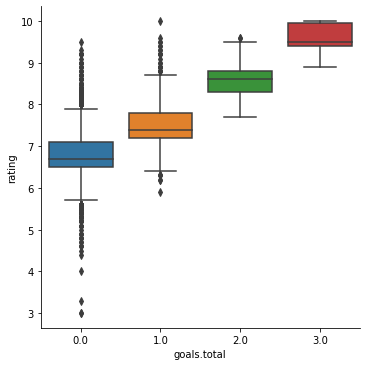

In [35]:
sns.catplot(x='goals.total', y='rating', data=players, kind='box')

plt.show()

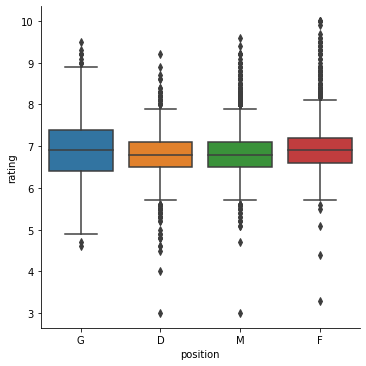

In [10]:
sns.catplot(x='position', y='rating', data=players, kind='box')

plt.show()

It seems that there is no bias towards a specific role, even if midf/forwards ratings have a higher variace.

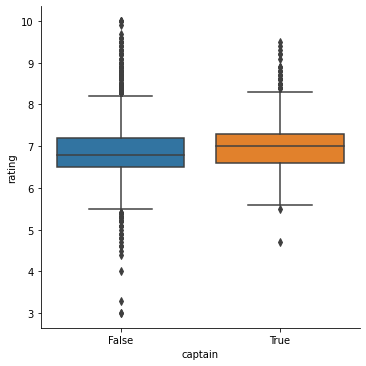

In [13]:
sns.catplot(x='captain', y='rating', data=players, kind='box')

plt.show()

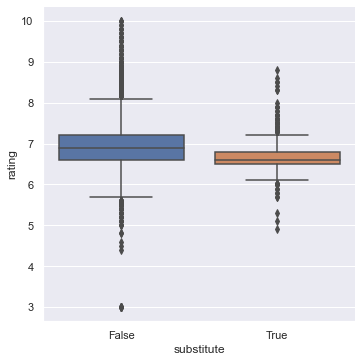

In [35]:
sns.catplot(x='substitute', y='rating', data=players, kind='box')

plt.show()

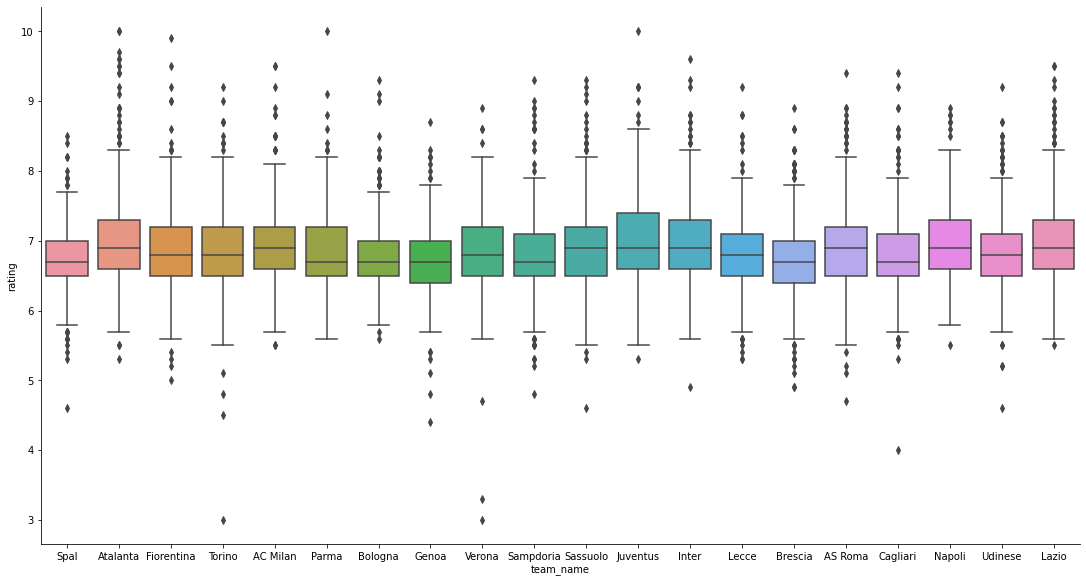

In [14]:
height = 8
sns.catplot(x='team_name', y='rating', data=players, kind='box', height=height, aspect=15/height)

plt.show()

In [16]:
players.columns

Index(['player_name', 'team_name', 'position', 'rating', 'minutes_played',
       'captain', 'substitute', 'shots.total', 'shots.on', 'goals.total',
       'goals.conceded', 'goals.assists', 'goals.saves', 'passes.total',
       'passes.key', 'passes.accuracy', 'tackles.total', 'tackles.blocks',
       'tackles.interceptions', 'duels.total', 'duels.won',
       'dribbles.attempts', 'dribbles.success', 'dribbles.past', 'fouls.drawn',
       'fouls.committed', 'cards.yellow', 'cards.red', 'penalty.won',
       'penalty.commited', 'penalty.success', 'penalty.missed',
       'penalty.saved', 'flg_captain', 'shots.on.pctg', 'duels.won.pctg',
       'dribbles.success.pctg'],
      dtype='object')

### Fixtures datasort_values

In [25]:
path = './data/fixture_stats/891-Serie_A-IT-2019/'

processer = LeagueData()

fixtures = processer.process_fixtures(path)

1 / 380 --- fixture_stats_232719.json
2 / 380 --- fixture_stats_232575.json
3 / 380 --- fixture_stats_232826.json
4 / 380 --- fixture_stats_232871.json
5 / 380 --- fixture_stats_232758.json
6 / 380 --- fixture_stats_232888.json
7 / 380 --- fixture_stats_232534.json
8 / 380 --- fixture_stats_232867.json
9 / 380 --- fixture_stats_232830.json
10 / 380 --- fixture_stats_232563.json
11 / 380 --- fixture_stats_232774.json
12 / 380 --- fixture_stats_232631.json
13 / 380 --- fixture_stats_232723.json
14 / 380 --- fixture_stats_232689.json
15 / 380 --- fixture_stats_232666.json
16 / 380 --- fixture_stats_232735.json
17 / 380 --- fixture_stats_232670.json
18 / 380 --- fixture_stats_232559.json
19 / 380 --- fixture_stats_232762.json
20 / 380 --- fixture_stats_232627.json
21 / 380 --- fixture_stats_232596.json
22 / 380 --- fixture_stats_232579.json
23 / 380 --- fixture_stats_232650.json
24 / 380 --- fixture_stats_232715.json
25 / 380 --- fixture_stats_232892.json
26 / 380 --- fixture_stats_232607.

In [26]:
print(fixtures.shape)
fixtures.head(10)

(380, 32)


,home.Shots_on_Goal,home.Shots_off_Goal,home.Total_Shots,home.Blocked_Shots,home.Shots_insidebox,home.Shots_outsidebox,home.Fouls,home.Corner_Kicks,home.Offsides,home.Ball_Possession,home.Yellow_Cards,home.Red_Cards,home.Goalkeeper_Saves,home.Total_passes,home.Passes_accurate,home.Passes_%,away.Shots_on_Goal,away.Shots_off_Goal,away.Total_Shots,away.Blocked_Shots,away.Shots_insidebox,away.Shots_outsidebox,away.Fouls,away.Corner_Kicks,away.Offsides,away.Ball_Possession,away.Yellow_Cards,away.Red_Cards,away.Goalkeeper_Saves,away.Total_passes,away.Passes_accurate,away.Passes_%
232719,4.0,3.0,9.0,2.0,5.0,4.0,12.0,7.0,0.0,0.45,2.0,NaN,4.0,395.0,294.0,0.74,6.0,7.0,15.0,2.0,9.0,6.0,14.0,3.0,1.0,0.55,3.0,NaN,3.0,491.0,403.0,0.82
232575,10.0,7.0,21.0,4.0,14.0,7.0,13.0,13.0,3.0,0.67,2.0,NaN,1.0,667.0,588.0,0.88,1.0,3.0,5.0,1.0,3.0,2.0,9.0,2.0,2.0,0.33,2.0,NaN,8.0,327.0,243.0,0.74
232826,2.0,6.0,8.0,0.0,7.0,1.0,19.0,0.0,0.0,0.42,3.0,NaN,5.0,373.0,283.0,0.76,6.0,8.0,17.0,3.0,11.0,6.0,12.0,5.0,4.0,0.58,2.0,NaN,0.0,495.0,392.0,0.79
232871,3.0,4.0,11.0,4.0,6.0,5.0,12.0,5.0,2.0,0.50,3.0,1.0,5.0,475.0,405.0,0.85,7.0,6.0,16.0,3.0,9.0,7.0,24.0,3.0,0.0,0.50,4.0,0.0,2.0,470.0,419.0,0.89
232758,6.0,5.0,11.0,0.0,6.0,5.0,13.0,6.0,0.0,0.48,4.0,NaN,3.0,459.0,390.0,0.85,4.0,3.0,10.0,3.0,7.0,3.0,15.0,6.0,2.0,0.52,2.0,NaN,3.0,486.0,413.0,0.85
232888,5.0,5.0,11.0,1.0,5.0,6.0,13.0,1.0,1.0,0.33,2.0,NaN,10.0,307.0,233.0,0.76,10.0,11.0,34.0,13.0,12.0,22.0,12.0,9.0,4.0,0.67,1.0,NaN,3.0,602.0,539.0,0.90
232534,9.0,8.0,26.0,9.0,14.0,12.0,14.0,12.0,1.0,0.58,2.0,NaN,2.0,398.0,325.0,0.82,5.0,2.0,10.0,3.0,7.0,3.0,17.0,5.0,3.0,0.42,2.0,NaN,7.0,287.0,211.0,0.74
232867,6.0,9.0,19.0,4.0,13.0,6.0,13.0,11.0,5.0,0.61,1.0,NaN,3.0,481.0,419.0,0.87,3.0,3.0,8.0,2.0,7.0,1.0,13.0,2.0,1.0,0.39,3.0,NaN,7.0,325.0,264.0,0.81
232830,8.0,9.0,25.0,8.0,15.0,10.0,19.0,8.0,1.0,0.58,5.0,NaN,0.0,486.0,428.0,0.88,1.0,3.0,8.0,4.0,5.0,3.0,10.0,3.0,3.0,0.42,1.0,NaN,6.0,355.0,291.0,0.82
232563,3.0,3.0,10.0,4.0,6.0,4.0,22.0,3.0,2.0,0.57,4.0,NaN,3.0,447.0,344.0,0.77,4.0,3.0,9.0,2.0,3.0,6.0,18.0,9.0,2.0,0.43,4.0,NaN,3.0,334.0,223.0,0.67


In [21]:
fixtures.describe().T

,count,mean,std,min,25%,50%,75%,max
home.Shots_on_Goal,380.0,4.828947,2.774688,0.00,3.0000,4.00,6.00,15.00
home.Shots_off_Goal,380.0,5.997368,3.022780,0.00,4.0000,6.00,8.00,19.00
home.Total_Shots,380.0,14.250000,5.940170,1.00,10.0000,14.00,18.00,40.00
home.Blocked_Shots,378.0,3.441799,2.271505,0.00,2.0000,3.00,5.00,12.00
home.Shots_insidebox,380.0,8.310526,4.128336,0.00,5.0000,8.00,11.00,26.00
home.Shots_outsidebox,380.0,5.981579,2.999943,0.00,4.0000,6.00,8.00,17.00
home.Fouls,380.0,12.739474,4.327981,3.00,10.0000,12.00,15.00,27.00
home.Corner_Kicks,380.0,5.586842,3.075194,0.00,3.0000,5.00,7.00,18.00
home.Offsides,371.0,2.258760,1.800270,0.00,1.0000,2.00,3.00,12.00
home.Ball_Possession,380.0,0.504395,0.112505,0.19,0.4200,0.50,0.59,0.80


In [27]:
league = processer.process_league('./data/fixtures/fixtures_891.json')

print(league.shape)
league.head(10)

(380, 14)


,elapsed,goalsHomeTeam,goalsAwayTeam,league_name,league_country,fixture_date,homeTeam.id,homeTeam.name,awayTeam.id,awayTeam.name,score.halftime,score.fulltime,score.extratime,score.penalty
891_232528,90,0,1,Serie A,Italy,2019-08-24 18:00:00,523,Parma,496,Juventus,0-1,0-1,None,None
891_232525,90,3,4,Serie A,Italy,2019-08-24 20:45:00,502,Fiorentina,492,Napoli,1-2,3-4,None,None
891_232533,90,1,0,Serie A,Italy,2019-08-25 18:00:00,494,Udinese,489,AC Milan,0-0,1-0,None,None
891_232524,90,0,1,Serie A,Italy,2019-08-25 20:45:00,490,Cagliari,518,Brescia,0-0,0-1,None,None
891_232526,90,1,1,Serie A,Italy,2019-08-25 20:45:00,504,Verona,500,Bologna,1-1,1-1,None,None
891_232529,90,3,3,Serie A,Italy,2019-08-25 20:45:00,497,AS Roma,495,Genoa,2-2,3-3,None,None
891_232530,90,0,3,Serie A,Italy,2019-08-25 20:45:00,498,Sampdoria,487,Lazio,0-1,0-3,None,None
891_232531,90,2,3,Serie A,Italy,2019-08-25 20:45:00,493,Spal,499,Atalanta,2-1,2-3,None,None
891_232532,90,2,1,Serie A,Italy,2019-08-25 20:45:00,503,Torino,488,Sassuolo,1-0,2-1,None,None
891_232527,90,4,0,Serie A,Italy,2019-08-26 20:45:00,505,Inter,867,Lecce,2-0,4-0,None,None


In [28]:
# Extract feature index to join league and fixture tables
league['ids'] = league.index.str.split('_')
league['fixture_id'] = league['ids'].apply(lambda x: int(x[1]))

fixtures_league = pd.merge(fixtures,
                           league[['goalsHomeTeam', 'goalsAwayTeam', 'homeTeam.id', 'awayTeam.id', 'fixture_id']],
                           left_index=True, right_on='fixture_id')

print(fixtures_league.shape)
fixtures_league.head(10)

(380, 37)


,home.Shots_on_Goal,home.Shots_off_Goal,home.Total_Shots,home.Blocked_Shots,home.Shots_insidebox,home.Shots_outsidebox,home.Fouls,home.Corner_Kicks,home.Offsides,home.Ball_Possession,home.Yellow_Cards,home.Red_Cards,home.Goalkeeper_Saves,home.Total_passes,home.Passes_accurate,home.Passes_%,away.Shots_on_Goal,away.Shots_off_Goal,away.Total_Shots,away.Blocked_Shots,away.Shots_insidebox,away.Shots_outsidebox,away.Fouls,away.Corner_Kicks,away.Offsides,away.Ball_Possession,away.Yellow_Cards,away.Red_Cards,away.Goalkeeper_Saves,away.Total_passes,away.Passes_accurate,away.Passes_%,goalsHomeTeam,goalsAwayTeam,homeTeam.id,awayTeam.id,fixture_id
891_232719,4.0,3.0,9.0,2.0,5.0,4.0,12.0,7.0,0.0,0.45,2.0,NaN,4.0,395.0,294.0,0.74,6.0,7.0,15.0,2.0,9.0,6.0,14.0,3.0,1.0,0.55,3.0,NaN,3.0,491.0,403.0,0.82,1,3,495,497,232719
891_232575,10.0,7.0,21.0,4.0,14.0,7.0,13.0,13.0,3.0,0.67,2.0,NaN,1.0,667.0,588.0,0.88,1.0,3.0,5.0,1.0,3.0,2.0,9.0,2.0,2.0,0.33,2.0,NaN,8.0,327.0,243.0,0.74,2,0,496,493,232575
891_232826,2.0,6.0,8.0,0.0,7.0,1.0,19.0,0.0,0.0,0.42,3.0,NaN,5.0,373.0,283.0,0.76,6.0,8.0,17.0,3.0,11.0,6.0,12.0,5.0,4.0,0.58,2.0,NaN,0.0,495.0,392.0,0.79,2,2,504,505,232826
891_232871,3.0,4.0,11.0,4.0,6.0,5.0,12.0,5.0,2.0,0.50,3.0,1.0,5.0,475.0,405.0,0.85,7.0,6.0,16.0,3.0,9.0,7.0,24.0,3.0,0.0,0.50,4.0,0.0,2.0,470.0,419.0,0.89,1,2,488,489,232871
891_232758,6.0,5.0,11.0,0.0,6.0,5.0,13.0,6.0,0.0,0.48,4.0,NaN,3.0,459.0,390.0,0.85,4.0,3.0,10.0,3.0,7.0,3.0,15.0,6.0,2.0,0.52,2.0,NaN,3.0,486.0,413.0,0.85,2,1,487,505,232758
891_232888,5.0,5.0,11.0,1.0,5.0,6.0,13.0,1.0,1.0,0.33,2.0,NaN,10.0,307.0,233.0,0.76,10.0,11.0,34.0,13.0,12.0,22.0,12.0,9.0,4.0,0.67,1.0,NaN,3.0,602.0,539.0,0.90,2,0,490,496,232888
891_232534,9.0,8.0,26.0,9.0,14.0,12.0,14.0,12.0,1.0,0.58,2.0,NaN,2.0,398.0,325.0,0.82,5.0,2.0,10.0,3.0,7.0,3.0,17.0,5.0,3.0,0.42,2.0,NaN,7.0,287.0,211.0,0.74,2,3,499,503,232534
891_232867,6.0,9.0,19.0,4.0,13.0,6.0,13.0,11.0,5.0,0.61,1.0,NaN,3.0,481.0,419.0,0.87,3.0,3.0,8.0,2.0,7.0,1.0,13.0,2.0,1.0,0.39,3.0,NaN,7.0,325.0,264.0,0.81,0,0,505,502,232867
891_232830,8.0,9.0,25.0,8.0,15.0,10.0,19.0,8.0,1.0,0.58,5.0,NaN,0.0,486.0,428.0,0.88,1.0,3.0,8.0,4.0,5.0,3.0,10.0,3.0,3.0,0.42,1.0,NaN,6.0,355.0,291.0,0.82,2,1,497,523,232830
891_232563,3.0,3.0,10.0,4.0,6.0,4.0,22.0,3.0,2.0,0.57,4.0,NaN,3.0,447.0,344.0,0.77,4.0,3.0,9.0,2.0,3.0,6.0,18.0,9.0,2.0,0.43,4.0,NaN,3.0,334.0,223.0,0.67,0,1,494,518,232563


In [30]:
# Join players and fixture statistics
players['ids'] = players.index.str.split('_')
players['fixture_id'] = players['ids'].apply(lambda x: int(x[0]))
players['team_id'] = players['ids'].apply(lambda x: int(x[2]))
df = pd.merge(players, fixtures_league, on = 'fixture_id')

print(df.shape)
df.head(10)

(10959, 77)


,player_name,team_name,position,rating,minutes_played,captain,substitute,shots.total,shots.on,goals.total,goals.conceded,goals.assists,goals.saves,passes.total,passes.key,passes.accuracy,tackles.total,tackles.blocks,tackles.interceptions,duels.total,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.drawn,fouls.committed,cards.yellow,cards.red,penalty.won,penalty.commited,penalty.success,penalty.missed,penalty.saved,flg_captain,flg_substitute,shots.on.pctg,duels.won.pctg,dribbles.success.pctg,ids,fixture_id,team_id,home.Shots_on_Goal,home.Shots_off_Goal,home.Total_Shots,home.Blocked_Shots,home.Shots_insidebox,home.Shots_outsidebox,home.Fouls,home.Corner_Kicks,home.Offsides,home.Ball_Possession,home.Yellow_Cards,home.Red_Cards,home.Goalkeeper_Saves,home.Total_passes,home.Passes_accurate,home.Passes_%,away.Shots_on_Goal,away.Shots_off_Goal,away.Total_Shots,away.Blocked_Shots,away.Shots_insidebox,away.Shots_outsidebox,away.Fouls,away.Corner_Kicks,away.Offsides,away.Ball_Possession,away.Yellow_Cards,away.Red_Cards,away.Goalkeeper_Saves,away.Total_passes,away.Passes_accurate,away.Passes_%,goalsHomeTeam,goalsAwayTeam,homeTeam.id,awayTeam.id
0,Etrit Berisha,Spal,G,8.2,90.0,False,False,0.0,0.0,0.0,3.0,0.0,11.0,20.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 30416, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
1,Thiago Cionek,Spal,D,6.0,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,69.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 3005, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
2,Francesco Vicari,Spal,D,6.4,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,90.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 30863, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
3,Felipe,Spal,D,6.3,90.0,True,False,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.00,"[232531, 30856, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
4,Marco D'Alessandro,Spal,M,6.7,71.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,22.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 30806, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
5,Mattia Valoti,Spal,M,6.5,65.0,False,False,1.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,50.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,1.00,"[232531, 30875, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
6,Simone Missiroli,Spal,M,6.7,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1.0,82.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.00,"[232531, 30867, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475.0,378.0,0.8,2,3,493,499
7,Jasmin Kurtić,Spal,M,6.9,90.0,False,False,1.0,0.0,0.0,0.0,0.0,0.0,16.0,1.0,66.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.50,"[232531, 30865, 493]",232531,493,3.0,6.0,9.0,0.0,6.0,3.0,13.0,2.0,2.0,0.4,2.0,NaN,11.0,332.0,238.0,0.72,13.0,7.0,21.0,1.0,13.0,8.0,16.0,10.0,2.0,0.6,1.0,NaN,1.0,475

### Feature Engineering - round 2

In [31]:
# At this level we have still both "home" and "away" statistics
# By the player's team_id, we split between "his team" stats and "other team" stats

# Home/Away feats to check
feats = ['Shots_on_Goal', 'Shots_off_Goal', 'Total_Shots', 'Blocked_Shots', 'Shots_insidebox', 'Shots_outsidebox',
         'Fouls', 'Corner_Kicks', 'Offsides', 'Ball_Possession', 'Yellow_Cards', 'Red_Cards', 'Goalkeeper_Saves',
         'Total_passes', 'Passes_accurate', 'Passes_%']

for feat in feats:
    # Set features for home team
    df.loc[df['homeTeam.id'] == df['team_id'], feat] = df[f'home.{feat}']
    df.loc[df['homeTeam.id'] == df['team_id'], f'other.{feat}'] = df[f'away.{feat}']
    
    # Set features for away team
    df.loc[df['awayTeam.id'] == df['team_id'], feat] = df[f'away.{feat}']
    df.loc[df['awayTeam.id'] == df['team_id'], f'other.{feat}'] = df[f'home.{feat}']
    
df.loc[df['homeTeam.id'] == df['team_id'], 'goals'] = df['goalsHomeTeam']
df.loc[df['homeTeam.id'] == df['team_id'], 'other.goals'] = df['goalsAwayTeam']
df.loc[df['awayTeam.id'] == df['team_id'], 'goals'] = df['goalsAwayTeam']
df.loc[df['awayTeam.id'] == df['team_id'], 'other.goals'] = df['goalsHomeTeam']

df.drop([f'home.{feat}' for feat in feats] + [f'away.{feat}' for feat in feats] + ['goalsHomeTeam', 'goalsAwayTeam'], 1, inplace=True)

print(df.shape)
df.head(10)

(10959, 77)


,player_name,team_name,position,rating,minutes_played,captain,substitute,shots.total,shots.on,goals.total,goals.conceded,goals.assists,goals.saves,passes.total,passes.key,passes.accuracy,tackles.total,tackles.blocks,tackles.interceptions,duels.total,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.drawn,fouls.committed,cards.yellow,cards.red,penalty.won,penalty.commited,penalty.success,penalty.missed,penalty.saved,flg_captain,flg_substitute,shots.on.pctg,duels.won.pctg,dribbles.success.pctg,ids,fixture_id,team_id,homeTeam.id,awayTeam.id,Shots_on_Goal,other.Shots_on_Goal,Shots_off_Goal,other.Shots_off_Goal,Total_Shots,other.Total_Shots,Blocked_Shots,other.Blocked_Shots,Shots_insidebox,other.Shots_insidebox,Shots_outsidebox,other.Shots_outsidebox,Fouls,other.Fouls,Corner_Kicks,other.Corner_Kicks,Offsides,other.Offsides,Ball_Possession,other.Ball_Possession,Yellow_Cards,other.Yellow_Cards,Red_Cards,other.Red_Cards,Goalkeeper_Saves,other.Goalkeeper_Saves,Total_passes,other.Total_passes,Passes_accurate,other.Passes_accurate,Passes_%,other.Passes_%,goals,other.goals
0,Etrit Berisha,Spal,G,8.2,90.0,False,False,0.0,0.0,0.0,3.0,0.0,11.0,20.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 30416, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
1,Thiago Cionek,Spal,D,6.0,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,69.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 3005, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
2,Francesco Vicari,Spal,D,6.4,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,90.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 30863, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
3,Felipe,Spal,D,6.3,90.0,True,False,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.00,"[232531, 30856, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
4,Marco D'Alessandro,Spal,M,6.7,71.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,22.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.00,"[232531, 30806, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
5,Mattia Valoti,Spal,M,6.5,65.0,False,False,1.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,50.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,1.00,"[232531, 30875, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
6,Simone Missiroli,Spal,M,6.7,90.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1.0,82.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.00,"[232531, 30867, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
7,Jasmin Kurtić,Spal,M,6.9,90.0,False,False,1.0,0.0,0.0,0.0,0.0,0.0,16.0,1.0,66.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.50,"[232531, 30865, 493]",232531,493,493,499,3.0,13.0,6.0,7.0,9.0,21.0,0.0,1.0,6.0,13.0,3.0,8.0,13.0,16.0,2.0,10.0,2.0,2.0,0.4,0.6,2.0,1.0,NaN,NaN,11.0,1.0,332.0,475.0,238.0,378.0,0.72,0.8,2.0,3.0
8,Igor Júlio,Spal

In [32]:
# Check if is home team
df['is_home'] = 0
df.loc[df['team_id'] == df['homeTeam.id'], 'is_home'] = 1

# Final result for the player
df['result'] = 'W'
df.loc[df['goals'] == df['other.goals'], 'result'] = 'D'
df.loc[df['goals'] < df['other.goals'], 'result'] = 'L'

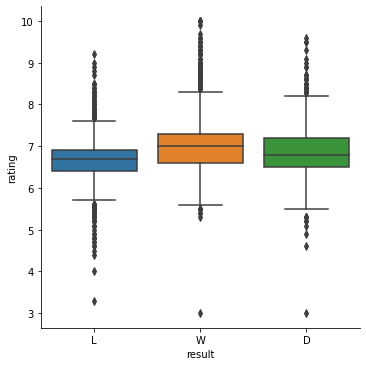

In [34]:
sns.catplot(x='result', y='rating', data=df, kind='box')

plt.show()